In [69]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


# Loading The Libraries

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

Loading data

In [71]:
df = pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [72]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Data Analysis

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

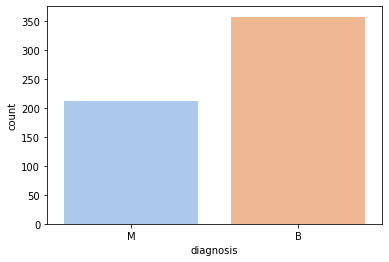

In [74]:
sns.countplot(x="diagnosis",data=df, palette="pastel")

# Data Preprocessing

In [75]:
#Drope non-essential columns
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [76]:
x = df.drop('diagnosis',axis=1)
y = df.diagnosis

In [77]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=40)

Encoding our data

In [78]:
from sklearn.preprocessing import LabelEncoder
#creating the object
lb = LabelEncoder()
ytrain = lb.fit_transform(ytrain)

In [79]:
xtrain.shape

(455, 30)

In [80]:
ytrain.shape

(455,)

# Features selection with RandomForest

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

Getting selected features

In [82]:
rf = RandomForestClassifier(n_estimators = 100)
select = SelectFromModel(rf)
select.fit(xtrain,ytrain)

SelectFromModel(estimator=RandomForestClassifier())

Ploting The feature importance

In [83]:
#print selected features
print(xtrain.columns[(select.get_support())])

Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst'],
      dtype='object')


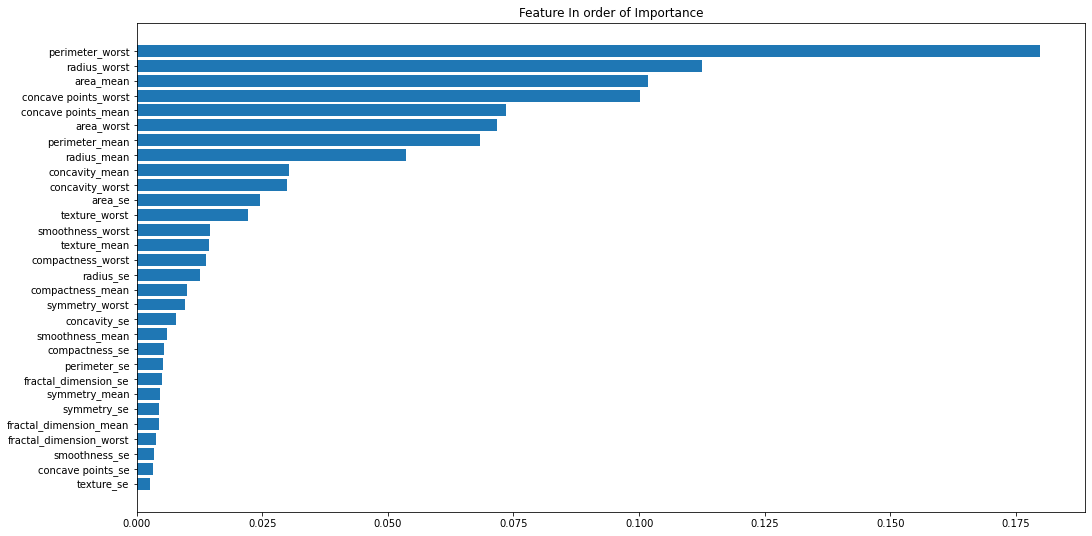

In [84]:
rf.fit(xtrain,ytrain)
plt.figure(figsize=(17, 9))
f_i = list(zip(xtrain.columns,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])
plt.title("Feature In order of Importance")
plt.show()


In [85]:
df_bestfeatures = df[['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst']]
df_bestfeatures.head()

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst
0,17.99,122.80,1001.0,0.3001,0.14710,25.38,184.60,2019.0,0.7119,0.2654
1,20.57,132.90,1326.0,0.0869,0.07017,24.99,158.80,1956.0,0.2416,0.1860
2,19.69,130.00,1203.0,0.1974,0.12790,23.57,152.50,1709.0,0.4504,0.2430
3,11.42,77.58,386.1,0.2414,0.10520,14.91,98.87,567.7,0.6869,0.2575
4,20.29,135.10,1297.0,0.1980,0.10430,22.54,152.20,1575.0,0.4000,0.1625


In [86]:
x_best = df_bestfeatures
y_best = df.diagnosis

In [87]:
print(x_best.shape,y_best.shape)

(569, 10) (569,)


In [88]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=40)

In [89]:
from sklearn.preprocessing import LabelEncoder
#creating the object
lb = LabelEncoder()
ytrain = lb.fit_transform(ytrain)
ytest = lb.transform(ytest)

In [90]:
#importing StandardScaler
from sklearn.preprocessing import MinMaxScaler,StandardScaler
#creating object
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [91]:
#importing keras
import keras
#importing sequential module
from keras.models import Sequential
# import dense module for hidden layers
from keras.layers import Dense
#importing activation functions
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [92]:
from tensorflow.keras.layers import BatchNormalization
#CREATING THE ANN AS SEQUENCE OF LAYERS
ann =Sequential()

#ADDING FIRST HIDDEN LAYER WITH 30 NEURONS, THE INPUT LAYER WILL BE ADDED AUTOMATICALLY,
ann.add(Dense(units = 30,activation = 'relu'))
ann.add(BatchNormalization())
ann.add(Dropout(0.5))

#ADDING 2ND HIDDEN LAYER WITH 30 NEURONS
ann.add(Dense(units = 30,activation = 'relu'))
ann.add(BatchNormalization())
ann.add(Dropout(0.5))

#ADDING OUTPUT LAYER WITH 1 NEURON , AS THIS IS A BINARY CLASSIFICATION
ann.add(Dense(units = 1,activation = 'sigmoid'))

In [93]:
#COMPILING THE ANN USING STOCHASTIC GRADIENT DESCENT (optimizer = 'adam')
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#setting callbacks for monitoring maximum accuracy
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

#TRAINING THE ANN WITH BATCH SIZE OF 32 (THIS IS A BATCH LEARNING)
model=ann.fit(xtrain, ytrain,batch_size = 32, validation_data=(xtest, ytest),epochs =100,callbacks = [early_stop])

Epoch 1/100
15/15 [==============================] - 1s 16ms/step - loss: 1.0817 - accuracy: 0.5055 - val_loss: 0.6557 - val_accuracy: 0.6579
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 0.8417 - accuracy: 0.5780 - val_loss: 0.5081 - val_accuracy: 0.8246
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6023 - accuracy: 0.7011 - val_loss: 0.4096 - val_accuracy: 0.8947
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.4720 - accuracy: 0.7670 - val_loss: 0.3502 - val_accuracy: 0.9035
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.4474 - accuracy: 0.7890 - val_loss: 0.3004 - val_accuracy: 0.9211
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.4264 - accuracy: 0.8044 - val_loss: 0.2627 - val_accuracy: 0.9561
Epoch 7/100
15/15 [==============================] - 0s 5ms/step - loss: 0.3844 - accuracy: 0.8330 - val_loss: 0.2308 - val_accuracy: 0.9561
Epoch 8/100


In [94]:
ann.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 30)                930       
_________________________________________________________________
batch_normalization_4 (Batch (None, 30)                120       
_________________________________________________________________
dropout_4 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 30)                930       
_________________________________________________________________
batch_normalization_5 (Batch (None, 30)                120       
_________________________________________________________________
dropout_5 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

<AxesSubplot:>

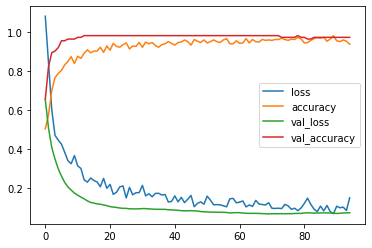

In [95]:
losses = pd.DataFrame(ann.history.history)
losses.plot()


In [96]:
#now testing for Test data
y_pred = ann.predict(xtest)
#converting values
y_pred = (y_pred>0.5)

In [97]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(ytest,y_pred)
score = accuracy_score(ytest,y_pred)
print(cm)
print('score is:',score)

[[74  1]
 [ 2 37]]
score is: 0.9736842105263158


In [98]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        75
           1       0.97      0.95      0.96        39

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



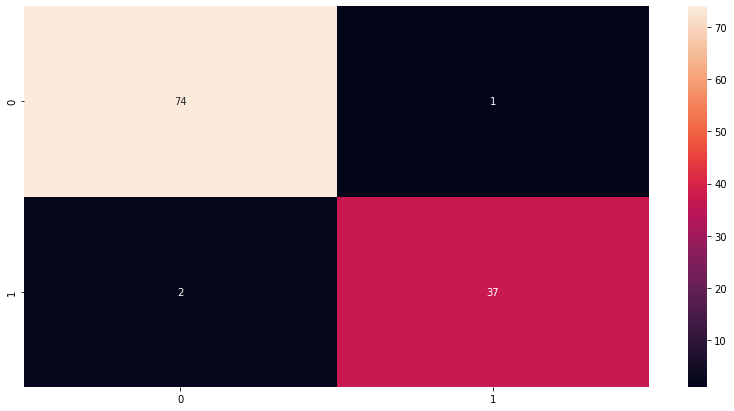

In [99]:
#Confusion Matrice
plt.figure(figsize=[14,7])
sns.heatmap(cm,annot=True)
plt.show()